In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [55]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

## One hot encoding

In [56]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [57]:
dummies = pd.get_dummies(df['purpose'])
dummies.drop('educational', axis = 1, inplace = True)
df = pd.concat([df.drop('purpose', axis = 1), dummies], axis = 1)
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


# Balancing the Data

## 1. Oversampling 

In [80]:
df_class0 = df[df['not.fully.paid'] == 0]
df_class1 = df[df['not.fully.paid'] == 1]
df_class1_oversampled = df_class1.sample(df_class0.shape[0], replace = True)
print(df_class0.shape)
print(df_class1_oversampled.shape)

(8045, 19)
(8045, 19)


In [81]:
df_oversampled = pd.concat([df_class0, df_class1_oversampled], axis = 0)
X = df_oversampled.drop('not.fully.paid', axis = 1)
y = df_oversampled['not.fully.paid']
print(X.shape)
print(y.shape)

(16090, 18)
(16090,)


# Training

In [82]:
from sklearn.model_selection import train_test_split
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = df_oversampled['not.fully.paid'])
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size = 0.3, random_state = 1, stratify = y_t)

## Random Forest

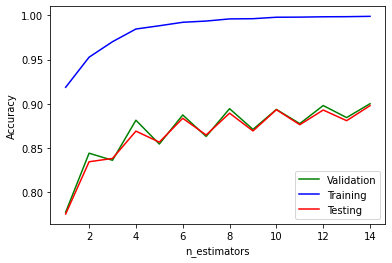

In [89]:
from sklearn.ensemble import RandomForestClassifier


k = 15
score_val = []
score_train = []
score_test = []

for i in range(1, k):
    loan_random_forest_model = RandomForestClassifier(n_estimators = i, random_state = 1)
    loan_random_forest_model.fit(X_train, y_train)
    score_train.append(loan_random_forest_model.score(X_train, y_train))
    score_val.append(loan_random_forest_model.score(X_val, y_val))
    score_test.append(loan_random_forest_model.score(X_test, y_test))


plt.plot([i for i in range(1,k)], score_val, 'g', label = 'Validation')
plt.plot([i for i in range(1,k)], score_train, 'b', label = 'Training')
plt.plot([i for i in range(1,k)], score_test, 'r', label = 'Testing')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
# n_estimators = 10

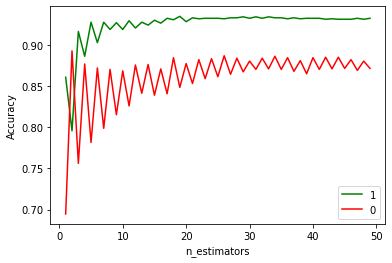

In [91]:
from sklearn.metrics import classification_report

k = 50

prec_1 = []
prec_0 = []

for i in range(1, k):
    loan_random_forest_model = RandomForestClassifier(n_estimators = i, random_state = 1)
    loan_random_forest_model.fit(X_train, y_train)
    class_rep = classification_report(loan_random_forest_model.predict(X_val), y_val, output_dict = True)
    prec_0.append(class_rep['0']['precision'])
    prec_1.append(class_rep['1']['precision'])


plt.plot([i for i in range(1,k)], prec_1, 'g', label = '1')
plt.plot([i for i in range(1,k)], prec_0, 'r', label = '0')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
# n_estimators = 40

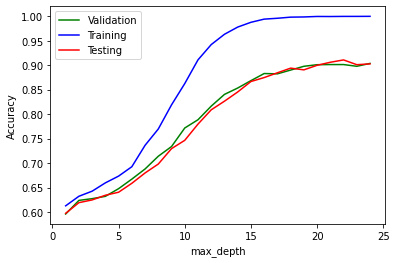

In [94]:

k = 25
score_val = []
score_train = []
score_test = []

for i in range(1, k):
    loan_random_forest_model = RandomForestClassifier(n_estimators = 40, max_depth = i, random_state = 1)
    loan_random_forest_model.fit(X_train, y_train)
    score_train.append(loan_random_forest_model.score(X_train, y_train))
    score_val.append(loan_random_forest_model.score(X_val, y_val))
    score_test.append(loan_random_forest_model.score(X_test, y_test))


plt.plot([i for i in range(1,k)], score_val, 'g', label = 'Validation')
plt.plot([i for i in range(1,k)], score_train, 'b', label = 'Training')
plt.plot([i for i in range(1,k)], score_test, 'r', label = 'Testing')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
# max_depth = 20

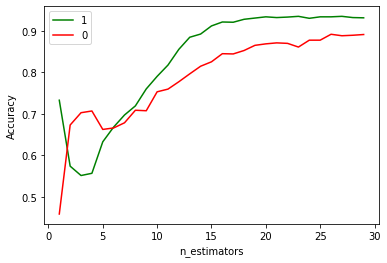

In [96]:
k = 30

prec_1 = []
prec_0 = []

for i in range(1, k):
    loan_random_forest_model = RandomForestClassifier(n_estimators = 40, max_depth = i, random_state = 1)
    loan_random_forest_model.fit(X_train, y_train)
    class_rep = classification_report(loan_random_forest_model.predict(X_val), y_val, output_dict = True)
    prec_0.append(class_rep['0']['precision'])
    prec_1.append(class_rep['1']['precision'])


plt.plot([i for i in range(1,k)], prec_1, 'g', label = '1')
plt.plot([i for i in range(1,k)], prec_0, 'r', label = '0')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
# max_depth = 30

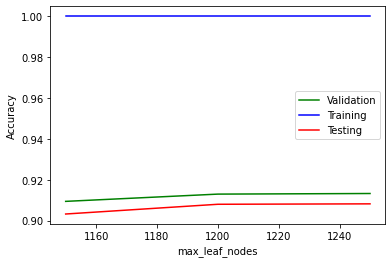

In [108]:
score_val = []
score_train = []
score_test = []

for i in [1150,1200,1250]:
    loan_random_forest_model = RandomForestClassifier(n_estimators = 40, max_depth = 30, max_leaf_nodes = i, random_state = 1)
    loan_random_forest_model.fit(X_train, y_train)
    score_train.append(loan_random_forest_model.score(X_train, y_train))
    score_val.append(loan_random_forest_model.score(X_val, y_val))
    score_test.append(loan_random_forest_model.score(X_test, y_test))


plt.plot([1150,1200,1250], score_val, 'g', label = 'Validation')
plt.plot([1150,1200,1250], score_train, 'b', label = 'Training')
plt.plot([1150,1200,1250], score_test, 'r', label = 'Testing')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.legend()
# max_leaf_nodes = 1200

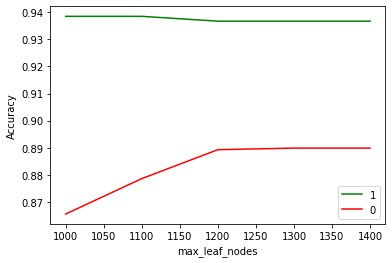

In [109]:
k = 1500
diff = 100

prec_1 = []
prec_0 = []

for i in range(1000,k,diff):
    loan_random_forest_model = RandomForestClassifier(n_estimators = 40, max_depth = 30, max_leaf_nodes = i, random_state = 1)
    loan_random_forest_model.fit(X_train, y_train)
    class_rep = classification_report(loan_random_forest_model.predict(X_val), y_val, output_dict = True)
    prec_0.append(class_rep['0']['precision'])
    prec_1.append(class_rep['1']['precision'])


plt.plot([i for i in range(1000,k,diff)], prec_1, 'g', label = '1')
plt.plot([i for i in range(1000,k,diff)], prec_0, 'r', label = '0')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.legend()
# max_leaf_nodes = 1200

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
loan_random_forest_model = RandomForestClassifier(n_estimators = 40, max_depth = 30, max_leaf_nodes = 1200, random_state = 1)
loan_random_forest_model.fit(X_train, y_train)
print(confusion_matrix(loan_random_forest_model.predict(X_test), y_test))
print(classification_report(loan_random_forest_model.predict(X_test), y_test))

[[2122  153]
 [ 291 2261]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2275
           1       0.94      0.89      0.91      2552

    accuracy                           0.91      4827
   macro avg       0.91      0.91      0.91      4827
weighted avg       0.91      0.91      0.91      4827



### Let us try another method to deal with imbalanced dataset
## 2. Undersampling

In [112]:
df_class0 = df[df['not.fully.paid'] == 0]
df_class1 = df[df['not.fully.paid'] == 1]
df_class0_undersampled = df_class0.sample(df_class1.shape[0])
print(df_class1.shape)
print(df_class0_undersampled.shape)

(1533, 19)
(1533, 19)


In [116]:
df_undersampled = pd.concat([df_class0_undersampled, df_class1], axis = 0)
X = df_undersampled.drop('not.fully.paid', axis = 1)
y = df_undersampled['not.fully.paid']
print(X.shape)
print(y.shape)

(3066, 18)
(3066,)


## Training

In [118]:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = df_undersampled['not.fully.paid'])
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size = 0.3, random_state = 1, stratify = y_t)

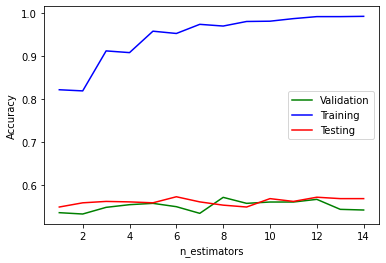

In [119]:
k = 15
score_val = []
score_train = []
score_test = []

for i in range(1, k):
    loan_random_forest_model = RandomForestClassifier(n_estimators = i, random_state = 1)
    loan_random_forest_model.fit(X_train, y_train)
    score_train.append(loan_random_forest_model.score(X_train, y_train))
    score_val.append(loan_random_forest_model.score(X_val, y_val))
    score_test.append(loan_random_forest_model.score(X_test, y_test))


plt.plot([i for i in range(1,k)], score_val, 'g', label = 'Validation')
plt.plot([i for i in range(1,k)], score_train, 'b', label = 'Training')
plt.plot([i for i in range(1,k)], score_test, 'r', label = 'Testing')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
# n_estimators = 10

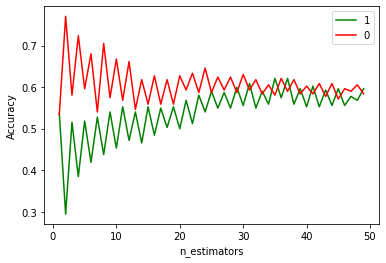

In [120]:
k = 50

prec_1 = []
prec_0 = []

for i in range(1, k):
    loan_random_forest_model = RandomForestClassifier(n_estimators = i, random_state = 1)
    loan_random_forest_model.fit(X_train, y_train)
    class_rep = classification_report(loan_random_forest_model.predict(X_val), y_val, output_dict = True)
    prec_0.append(class_rep['0']['precision'])
    prec_1.append(class_rep['1']['precision'])


plt.plot([i for i in range(1,k)], prec_1, 'g', label = '1')
plt.plot([i for i in range(1,k)], prec_0, 'r', label = '0')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()

#### Undersampling gives bad results in this case, clearly. So, let us stick to the results by oversampling method.